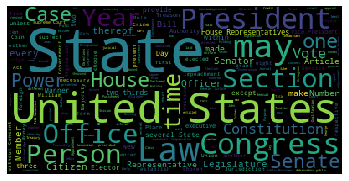

In [2]:
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Read the whole text, for English
text=open('D:\edu_pythonADV\constitution.txt').read()
wordcloud=WordCloud().generate(text)
#Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [8]:
#-*- coding:utf-8 -*-
from collections import Counter
import urllib
import random
import webbrowser

from konlpy.tag import Hannanum
from lxml import html
import pytagcloud 
import sys

if sys.version_info[0]>=3:
    urlopen=urllib.request.urlopen
else:
    urlopen=urllib.urlopen
    
r=lambda: random.randint(0,255)
color=lambda:(r(),r(),r())
def get_bill_text(billnum):
    url='http://web.archive.org/web/20150904232336/http://pokr.kr/bill/%s/text' %billnum
    response=urlopen(url).read().decode('utf-8')
    page=html.fromstring(response)
    text=page.xpath(".//div[@id='bill-sections']/pre/text()")[0]
    return text

def get_tags(text,ntags=50,multiplier=10):
    h=Hannanum()
    nouns=h.nouns(text)
    count=Counter(nouns)
    return [{'color':color(),'tag':n,'size':c*multiplier*2} for n,c in count.most_common(ntags)]

def draw_cloud(tags,filename,fontname='H2GTRM',size=(800,600)):
    pytagcloud.create_tag_image(tags,filename,fontname=fontname,size=size)
    webbrowser.open(filename)
    
bill_num='1904882'
text=get_bill_text(bill_num)
tags=get_tags(text)
print(tags)
draw_cloud(tags,'wordcloud4.png')

[{'color': (242, 20, 63), 'tag': '동물', 'size': 160}, {'color': (251, 172, 213), 'tag': '행위', 'size': 160}, {'color': (6, 4, 231), 'tag': '인터넷', 'size': 120}, {'color': (122, 131, 18), 'tag': '촬영', 'size': 120}, {'color': (82, 90, 93), 'tag': '등', 'size': 100}, {'color': (167, 126, 236), 'tag': '영상물', 'size': 100}, {'color': (44, 23, 197), 'tag': '다음', 'size': 100}, {'color': (180, 72, 185), 'tag': '호', 'size': 80}, {'color': (161, 7, 130), 'tag': '학대', 'size': 80}, {'color': (30, 26, 95), 'tag': '수', 'size': 80}, {'color': (61, 213, 42), 'tag': '게재', 'size': 80}, {'color': (114, 117, 107), 'tag': '신설', 'size': 80}, {'color': (52, 29, 63), 'tag': '고통', 'size': 80}, {'color': (12, 30, 95), 'tag': '①', 'size': 80}, {'color': (241, 178, 107), 'tag': '∼', 'size': 80}, {'color': (59, 151, 123), 'tag': '생', 'size': 80}, {'color': (157, 116, 3), 'tag': '략', 'size': 80}, {'color': (3, 47, 160), 'tag': '현행', 'size': 80}, {'color': (44, 241, 215), 'tag': '동물보호법', 'size': 60}, {'color': (223, 219,